# AAPL
Apple Inc. (AAPL) is a technology company that designs, manufactures, and sells consumer electronics, software, and services. The company is known for its innovative products such as the iPhone, iPad, Mac computers, Apple Watch, and Apple TV. Apple also offers a range of services including the App Store, Apple Music, iCloud, and Apple Pay.

## Settings

In [3]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [4]:
ticker = 'AAPL'
facts = get_facts(ticker=ticker)

## Income

Apple still earns a lot of money from iPhone sales, but the growth has definitely slowed down. 

Back in 2021, Apple was making $94.6B in net income, which is $30B more than that of Microsoft. As of 2024, Apple's net income is $93.7B, which is only $5B more than that of Microsoft.

Not just it has slowed down, but the net income has also decreased for 2 consecutive years. 

In [5]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2020-09-26,57411000000,2020
14,2021-09-25,94680000000,2021
15,2022-09-24,99803000000,2022
16,2023-09-30,96995000000,2023
17,2024-09-28,93736000000,2024


## Income Growth (%)

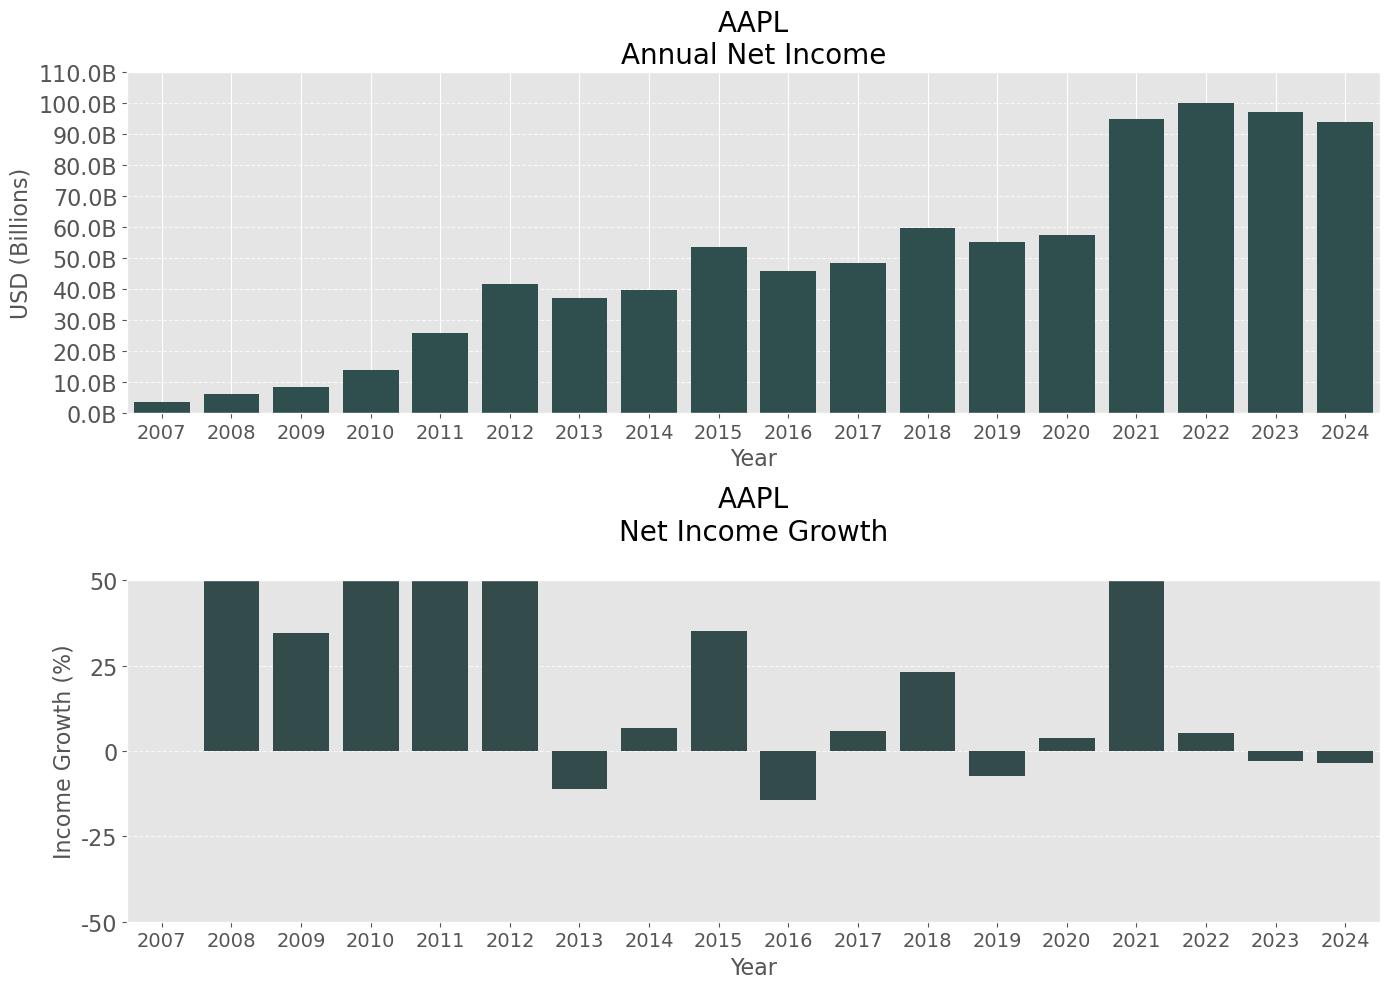

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=100e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

Even with the decrease in net income, the stock price has been increasing between 2021 and 2024. It has peaked over $250 at the early 2025, but has since dropped under $200 due to the tariff war between the US and China.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


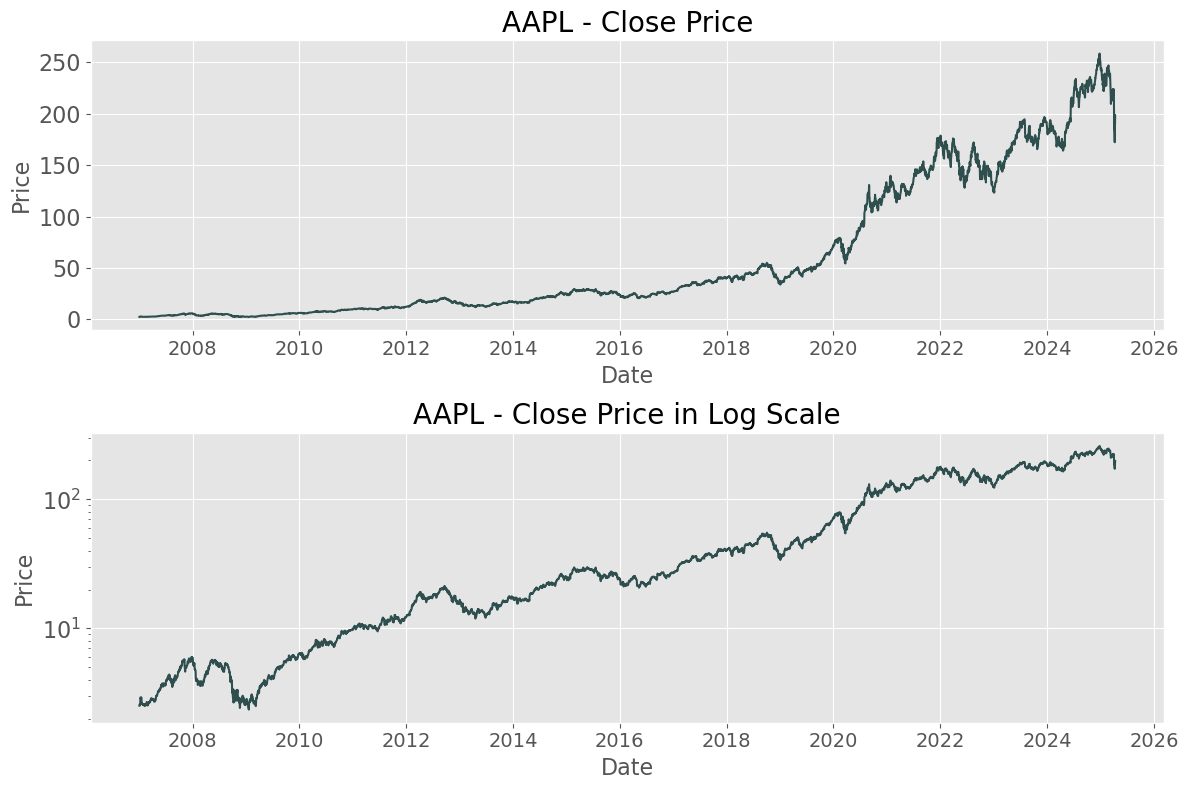

In [13]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

Apple pays dividends to its shareholders, but the growth rate has been decreasing.

In [8]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
7,2020-09-26,14081000000,2020
8,2021-09-25,14467000000,2021
9,2022-09-24,14841000000,2022
10,2023-09-30,15025000000,2023
11,2024-09-28,15234000000,2024


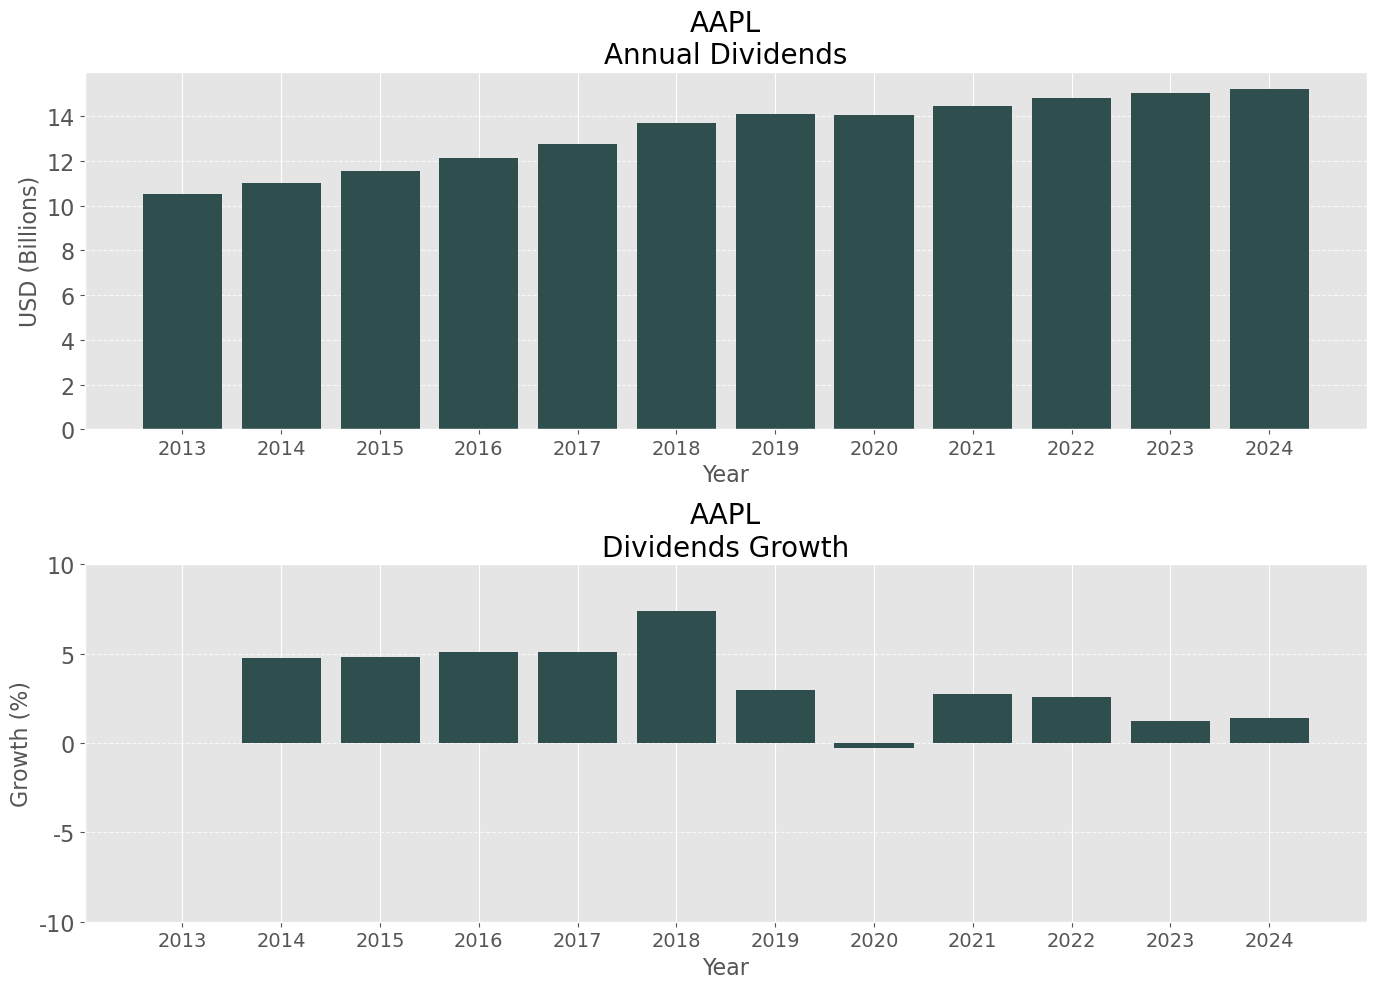

In [14]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=10, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio of Apple has increased rapidly since 2020. High P/E ratio was supported by the high growth rate of net income, but can be a concern when the growth rate slows down.

In [10]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for AAPL: 31.76


[*********************100%***********************]  1 of 1 completed


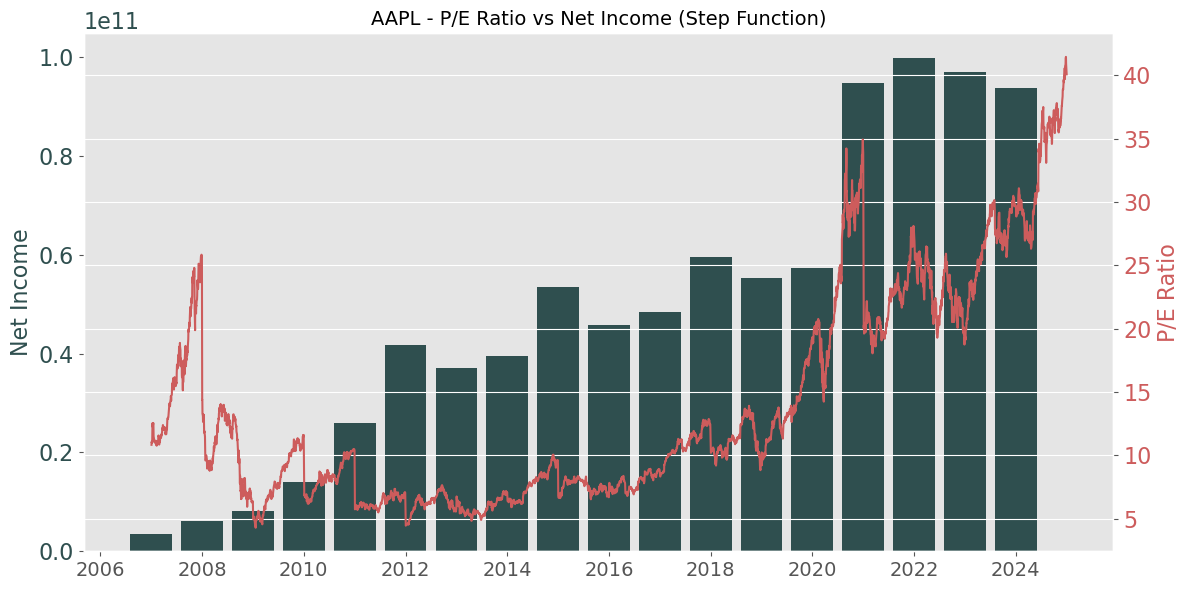

In [11]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

Apple is a good company, or at least it was. But the net income has been decreasing for 2 consecutive years, while the stock price has been increasing. The P/E ratio is also high, which means the stock is overvalued. 

Future of the company is also uncertain. Apple car project has been cancelled, and the new product Apple Vision Pro does not seem to be a hit. Tariff war between the US and China is also a concern.

I have AAPL about 10% of my portfolio, but given the current situation, I will consider selling it. It would have been nice if I had sold it at the peak price of $250.